In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv('reddit_wsb_daily.csv')

# Selecting relevant data from thread body only
df = df[["date", "count_body",
        "count_gme_body",
        "count_amc_body",
        "count_bb_body",
        "count_clov_body"]]

# Cleaning data
df["date"] = pd.to_datetime(df["date"])

# Aggregating data
new_df = pd.DataFrame()
new_df["date"] = df["date"]
new_df["GME"] = df["count_gme_body"]
new_df["AMC"] = df["count_amc_body"]
new_df["BB"] = df["count_bb_body"]
new_df["CLOV"] = df["count_clov_body"]
new_df["total"] = df.loc[:,["count_gme_body", "count_amc_body", "count_bb_body", "count_clov_body"]].sum(axis=1)

# Cleaning aggregated data
# Change NA to 0
new_df["GME"] = new_df["GME"].fillna(0)
new_df["AMC"] = new_df["AMC"].fillna(0)
new_df["BB"] = new_df["BB"].fillna(0)
new_df["CLOV"] = new_df["CLOV"].fillna(0)
new_df["total"] = new_df["total"].fillna(0)

# Display new data
new_df

date     GME     AMC     BB  CLOV   total
0   2021-01-28   255.0   114.0   63.0   0.0   432.0
1   2021-01-29  2507.0  1011.0  623.0   0.0  4141.0
2   2021-01-30   363.0    87.0   49.0   0.0   499.0
3   2021-01-31   279.0    53.0   37.0   0.0   369.0
4   2021-02-01   215.0    48.0   34.0   0.0   297.0
..         ...     ...     ...    ...   ...     ...
171 2021-08-12     1.0     0.0    1.0   1.0     3.0
172 2021-08-13     2.0     1.0    1.0   2.0     6.0
173 2021-08-14     1.0     1.0    0.0   2.0     4.0
174 2021-08-15     0.0     1.0    0.0   0.0     1.0
175 2021-08-16     0.0     1.0    0.0   1.0     2.0

[176 rows x 6 columns]

In [3]:
# Filter: 11 May - 17 May
start_date = np.datetime64("2021-05-11")
end_date = np.datetime64("2021-05-17")
df1 = new_df[(new_df['date'] >= start_date) & (new_df['date'] <= end_date)]
df1 = df1.drop("date", axis=1)
df1 = df1.sum()
df1 = df1/df1["total"] * 100
df1 = df1.drop("total")

# Filter: 18 May - 21 May
start_date = np.datetime64("2021-05-18")
end_date = np.datetime64("2021-05-21")
df2 = new_df[(new_df['date'] >= start_date) & (new_df['date'] <= end_date)]
df2 = df2.drop("date", axis=1)
df2 = df2.sum()
df2 = df2/df2["total"] * 100
df2 = df2.drop("total")

# Filter: 24 May - 27 May
start_date = np.datetime64("2021-05-24")
end_date = np.datetime64("2021-05-27")
df3 = new_df[(new_df['date'] >= start_date) & (new_df['date'] <= end_date)]
df3 = df3.drop("date", axis=1)
df3 = df3.sum()
df3 = df3/df3["total"] * 100
df3 = df3.drop("total")

frames = pd.concat([df1, df2, df3], axis=1)
results = frames.transpose().rename(index={0: "11 May - 17 May", 
                                                          1: "18 May - 21 May",
                                                          2: "24 May - 27 May"})

results

GME        AMC         BB       CLOV
11 May - 17 May  47.169811  28.301887   9.433962  15.094340
18 May - 21 May  47.058824  35.294118  11.764706   5.882353
24 May - 27 May  52.000000  32.000000  16.000000   0.000000

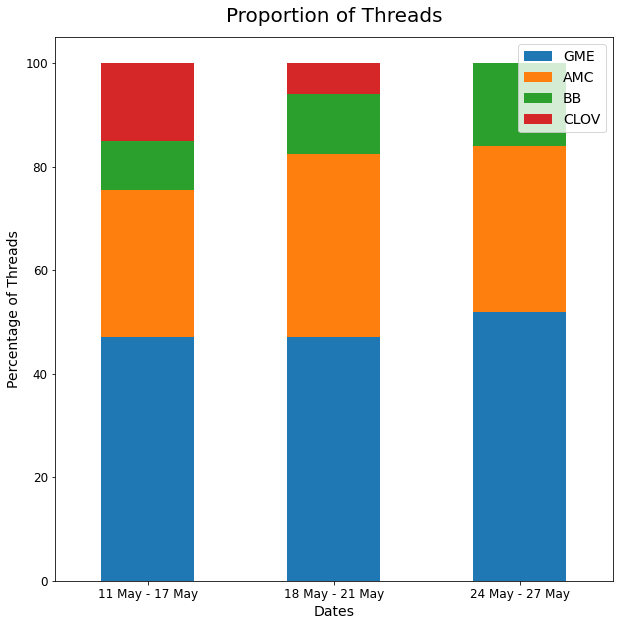

In [4]:
# Plotting
ax = results.plot(kind="bar", stacked=True, figsize=(10,10))
ax.set_ylabel("Percentage of Threads", fontsize=14)
ax.set_xlabel("Dates", fontsize=14)
ax.set_title("Proportion of Threads", fontsize=20, pad=15)
ax.legend(fontsize=14)
plt.xticks(rotation=0) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [5]:
# Filter: 21 Jun - 25 Jun
start_date = np.datetime64("2021-06-21")
end_date = np.datetime64("2021-06-25")
df1 = new_df[(new_df['date'] >= start_date) & (new_df['date'] <= end_date)]
df1 = df1.drop("date", axis=1)
df1 = df1.sum()
df1 = df1/df1["total"] * 100
df1 = df1.drop("total")

# Filter: 28 Jun - 01 Jul
start_date = np.datetime64("2021-06-28")
end_date = np.datetime64("2021-07-01")
df2 = new_df[(new_df['date'] >= start_date) & (new_df['date'] <= end_date)]
df2 = df2.drop("date", axis=1)
df2 = df2.sum()
df2 = df2/df2["total"] * 100
df2 = df2.drop("total")

# Filter: 02 Jul - 06 Jul
start_date = np.datetime64("2021-07-02")
end_date = np.datetime64("2021-07-06")
df3 = new_df[(new_df['date'] >= start_date) & (new_df['date'] <= end_date)]
df3 = df3.drop("date", axis=1)
df3 = df3.sum()
df3 = df3/df3["total"] * 100
df3 = df3.drop("total")

frames = pd.concat([df1, df2, df3], axis=1)
results = frames.transpose().rename(index={0: "21 Jun - 25 Jun", 
                                                          1: "28 Jun - 01 Jul",
                                                          2: "02 Jul - 06 Jul"})

results

GME        AMC         BB       CLOV
21 Jun - 25 Jun  29.213483  28.089888  24.719101  17.977528
28 Jun - 01 Jul  31.707317  26.829268  24.390244  17.073171
02 Jul - 06 Jul  30.000000  32.500000  20.000000  17.500000

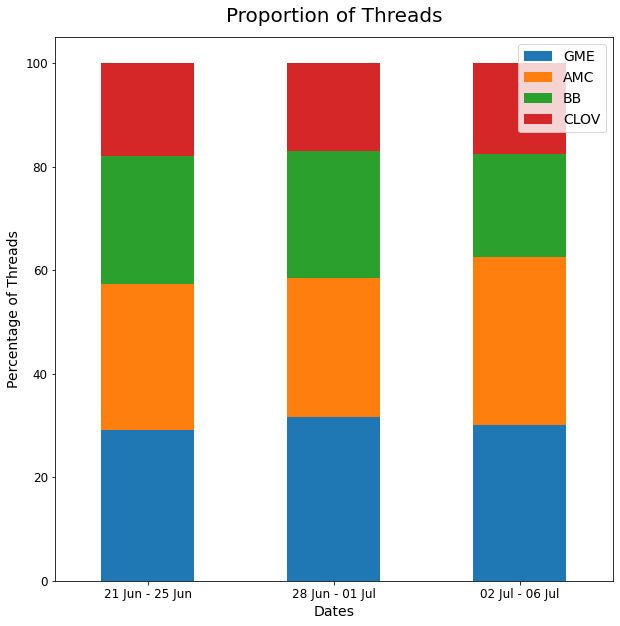

In [6]:
ax = results.plot(kind="bar", stacked=True, figsize=(10,10))
ax.set_ylabel("Percentage of Threads", fontsize=14)
ax.set_xlabel("Dates", fontsize=14)
ax.set_title("Proportion of Threads", fontsize=20, pad=15)
ax.legend(fontsize=14)
plt.xticks(rotation=0) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()